<a href="https://colab.research.google.com/github/Jibrankhan26/Stock_Prediction_Using_LSTM/blob/main/Stock_Prediction_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

Reading the Dataset

In [3]:
df=pd.read_csv("WIPRO.csv")

In [4]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8))

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

Creating Training Dataset

In [6]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

Required Format for LSTM(Long Short-Term Memory)

In [7]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

In [8]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

Building the Model

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

Training The Model

In [12]:
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
4185/4185 [==============================] - 142s 33ms/step - loss: 2.7907e-04
Epoch 2/5
4185/4185 [==============================] - 133s 32ms/step - loss: 1.2924e-04
Epoch 3/5
4185/4185 [==============================] - 137s 33ms/step - loss: 8.9583e-05
Epoch 4/5
4185/4185 [==============================] - 133s 32ms/step - loss: 7.9043e-05
Epoch 5/5
4185/4185 [==============================] - 134s 32ms/step - loss: 6.9609e-05


Creating Testing Dataset

In [13]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

In [14]:
x_test = np.array(x_test)

In [15]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

34/34 [==============================] - 2s 18ms/step


Calculating RMSE (Root Mean Square Error)



In [17]:
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 17.843370468901867


Analyzing the Data

<ipython-input-19-5547ced3859b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


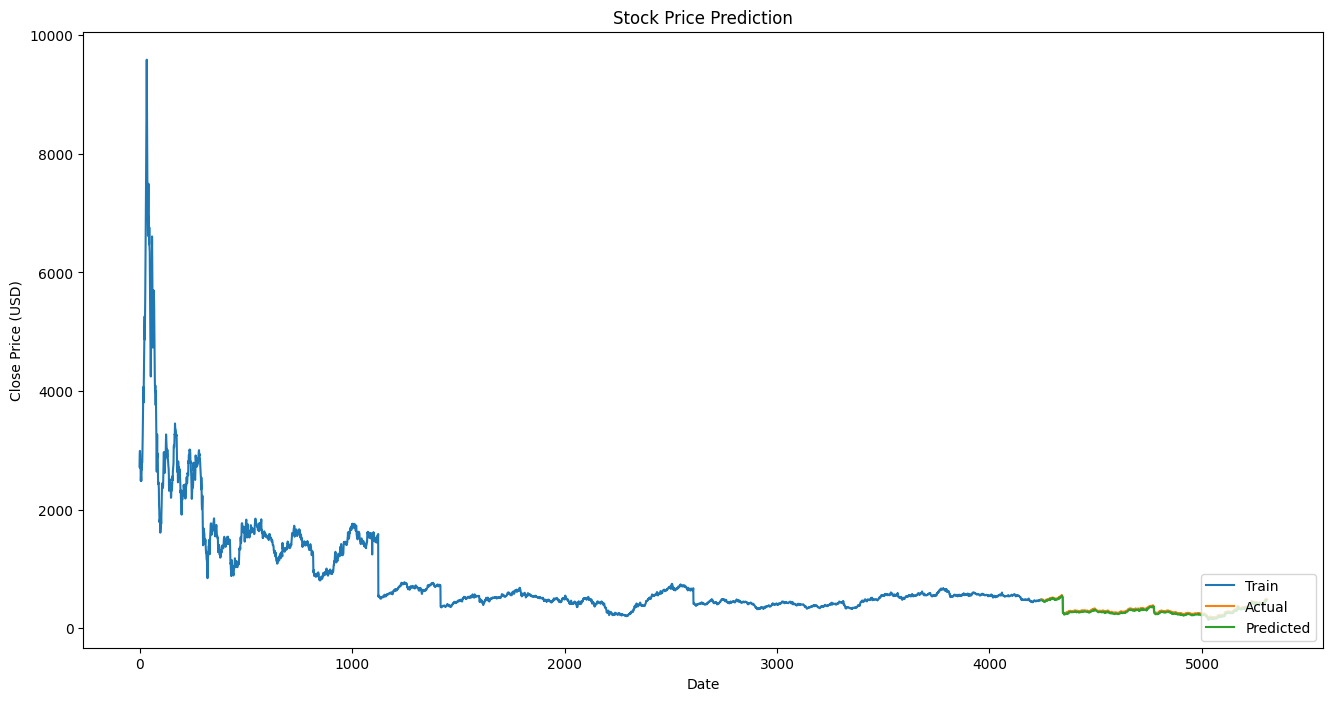

In [19]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predicted'], loc='lower right')
plt.show()

 End.